<a href="https://colab.research.google.com/github/Valeri22222/UNN/blob/main/%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

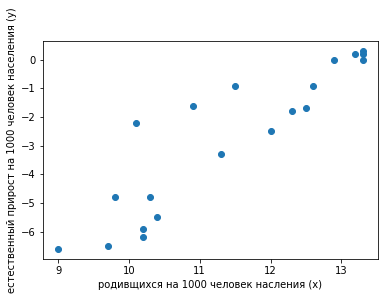

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy
import seaborn as sns

from numpy import mean, ptp, var, std
from sklearn.linear_model import LinearRegression

dataX = np.array([9, 9.7, 10.2, 10.4, 10.2, 10.3, 11.3, 12, 12.3, 12.5, 12.6, 13.3, 13.2, 13.3, 13.3, 12.9, 11.5, 10.9, 10.1, 9.8])
dataY = np.array([-6.6, -6.5, -6.2, -5.5, -5.9, -4.8, -3.3, -2.5, -1.8, -1.7, -0.9, 0, 0.2, 0.2, 0.3, -0.01, -0.9, -1.6, -2.2, -4.8])


plt.scatter(dataX, dataY)
plt.xlabel('родивщихся на 1000 чeловек насления (х)')
plt.ylabel('естественный прирост на 1000 человек населения (у)')
plt.show()

In [ ]:
data = np.vstack((dataX, dataY))
df = pd.DataFrame(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9.0,9.7,10.2,10.4,10.2,10.3,11.3,12.0,12.3,12.5,12.6,13.3,13.2,13.3,13.3,12.90,11.5,10.9,10.1,9.8
1,-6.6,-6.5,-6.2,-5.5,-5.9,-4.8,-3.3,-2.5,-1.8,-1.7,-0.9,0.0,0.2,0.2,0.3,-0.01,-0.9,-1.6,-2.2,-4.8


In [ ]:
dataX = np.reshape(dataX, (20, 1))
dataY = np.reshape(dataY, (20, 1))
dfX = pd.DataFrame(dataX)
dfY = pd.DataFrame(dataY)
model = LinearRegression().fit(dfX, dfY)

1. Найти корреляционную зависимость между фактором х и результирующим признаком у

In [ ]:
print('b= ',model.coef_)
print('a= ', model.intercept_)

b=  [[1.59443807]]
a=  [-20.96587156]


2. На одном графике построить данные и теоритическую прямую

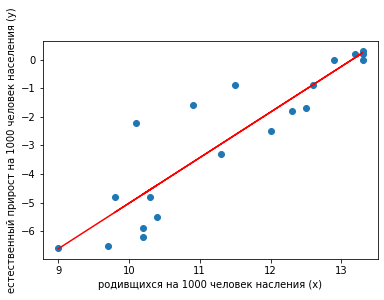

In [ ]:
plt.scatter(dataX, dataY)
plt.plot(dataX, model.predict(dfX), 'r')
plt.xlabel('родивщихся на 1000 чeловек насления (х)')
plt.ylabel('естественный прирост на 1000 человек населения (у)')
plt.show()

3. найти коэфицинт вариации

In [ ]:
K_v = (math.sqrt(var(dfX)))/(mean(dfX))
print(K_v)
print('вариация считается однородной')

0    0.121072
dtype: float64
вариация считается однородной


4. найдем коэффициент корреляции

In [ ]:
cor = np.corrcoef(data)
print('коэффицинт коррeляции= ',cor[1][0])
corr = cor[1][0]

коэффицинт коррeляции=  0.9042797122606165


тесная связь между признаками

5. Оценим точность модели

In [ ]:
data_2 = np.hstack((dataX, dataY))
df_2 = pd.DataFrame(data_2)
df_2.columns = ['x', 'y']
df_2['y_predict'] = np.array(model.predict(dfX))
df_2['A'] = abs((df_2['y']-df_2['y_predict'])/df_2['y'])
df_2.loc[11]['A'] = 0
A = df_2['A'].mean()
print('точность модели = ', A)
print('свидетельствует о хорошем подборе модели')

точность модели =  2.307042464264196
свидетельствует о хорошем подборе модели


6. Проведём дисперсионный анализ

In [ ]:
df_2['y_sum'] = (df_2['y'] - df_2['y'].mean())**2
df_2['yp_sum'] = (df_2['y_predict'] - df_2['y'].mean())**2
df_2['e2'] = (df_2['y_predict'] - df_2['y'])**2

arr = np.array([df_2['y_sum'].sum(), df_2['yp_sum'].sum(), df_2['e2'].sum()])
arr_2 = np.array([19, 1, 18])
arr = np.reshape(arr, (3, 1))
arr_2 = np.reshape(arr_2, (3, 1))
arr_3 = np.hstack((arr, arr_2))
df_3 = pd.DataFrame(arr_3, columns = ['сумма квадратов', 'число степеней свободы'], index = ['общая', 'факторная', 'остаточная'])
df_3['диспесия на одну степень свободы'] = df_3['сумма квадратов']/df_3['число степеней свободы']
df_3.head()

,сумма квадратов,число степеней свободы,диспесия на одну степень свободы
общая,119.283095,19.0,6.278058
факторная,97.540387,1.0,97.540387
остаточная,21.742708,18.0,1.207928


7. найдем коэффициент детерминации

In [ ]:
k_r = arr[1]/arr[0]
print('R^2= ', k_r[0])

R^2=  0.8177217980061438


сила связи высока и уравнение регрессии хорошо подобрано

8. Проврим адекватность модели с помощью F-критерия Фишера

In [ ]:
print((corr**2)/(1-corr**2)*18)

80.75015115963599


Так как Fф>Fт(4,41387), то гипотеза Н0 о случайной природе оцениваемых характеристик отклоняется, и признается их статистическая значимость и надёжность уравнения регрессии

10. Найдём доверительные интервалы для статистически важных параметров модели

In [ ]:
ttab = 3.23676
dis = math.sqrt((((df_2['x'] - df_2['x'].mean())**2).sum())/20)
b = (math.sqrt(df_3.loc['остаточная']['диспесия на одну степень свободы']))/(math.sqrt(20)*dis)
print(model.coef_[0][0]-ttab*b,'<= b >=',model.coef_[0][0]+ttab*b)

1.0201279353938473 <= b >= 2.1687482113951444


In [ ]:
df_2['x^2'] = df_2['x']**2
x2_sum = math.sqrt(df_2['x^2'].sum())
dis = math.sqrt((((df_2['y'] - df_2['y'].mean())**2).sum())/20)
a = (x2_sum/(dis*20))*math.sqrt(df_3.loc['остаточная']['диспесия на одну степень свободы'])
print(model.intercept_[0]-ttab*a,'<= a >=',model.intercept_[0]+ttab*a)

-24.7192950690236 <= a >= -17.212448050242465


11. оценим точность прогноза, расчитав ошибку прогноза и его доверительный интервал

In [ ]:
xp = 1.1 *df_2['x'].mean()
yp = model.intercept_[0] + model.coef_[0][0]*xp
df_2['(x-xpredict)2'] = (df_2['x'] - df_2['x'].mean())**2
m_yp = dis*math.sqrt(1+(1/20)+(((xp-df_2['x'].mean())**2)/(df_2['(x-xpredict)2'].sum())))
print(yp-ttab*m_yp,'<= y(xp) >=',yp+ttab*m_yp)

-9.131876132048767 <= y(xp) >= 7.32895044397538


12. Найдем доверительный интервал для инивидуальных значений зависимой переменной

In [ ]:
m_yx = math.sqrt((dis**2)*((1/20)+(((xp-df_2['x'].mean())**2)/(df_2['(x-xpredict)2'].sum()))))
print(yp-ttab*m_yx,'<= Mx(y) >=',yp+ttab*m_yx)

-3.193961044773613 <= Mx(y) >= 1.3910353567002263


13. поверим удоветворяют ли остатки условию Гаусса-Маркова

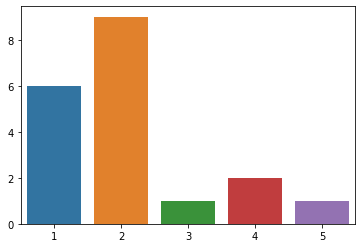

In [ ]:
df_2['e'] = df_2['y'] - df_2['y_predict']
e = np.array(df_2['e'])
e2 = np.array(df_2['e2'])
e = np.reshape(e, (20, 1))
e2 = np.reshape(e2, (20, 1))
e = np.hstack((e, e2))
e = pd.DataFrame(e, columns = ['e', 'e2'])
gist = np.array([6, 9, 1, 2, 1])
gis = np.array(['1', '2', '3', '4', '5'])
sns.barplot(x=gis, y=gist)

по RS-критеррию поверим соответсвие ряда остатков нормальному закону

In [ ]:
S = math.sqrt(df_2['e2'].sum()/19)
RS = (df_2['e'].max() - df_2['e'].min())/S
print('RS= ', RS)

RS=  3.8882595238456825


По таблице а=3,18 b=4,49 не принимается гипотеза о соответсвии ряда норрмальному закону





Теперь проверим случайнасть элементов ряда остатков

In [ ]:
p = 0
i = 1
ar = np.array(df_2['e'])
while i<20:
    if (ar[i]*ar[i-1]) < 0 :
        p += 1
    i += 1

pp = (((2*18)/3)-1.96*(math.sqrt((16*20-29)/90)))
print('p= ', p, ' < ', pp)

p=  4  <  8.475631498646411


ряд не является случайным

Провeрим, есть ли автокорреляция

In [ ]:
i = 1
s = 0
while i<20:
    s = s + ((ar[i]-ar[i-1])**2)
    i += 1
print('0< ',s/(e['e2'].sum()),' <=1,2')

0<  0.4634378308681657  <=1,2


уровни остатков сильно автокорелированные и медель неадекватна

проведем тест Голдфельда Квандта на обнаружние гетероскедантичности

In [ ]:
testg, testg1 = np.array_split(np.array(df_2['x']),2)
testg2, testg3 = np.array_split(np.array(df_2['y']),2)
test = np.reshape(testg, (10, 1))
test1 = np.reshape(testg1, (10, 1))
test2 = np.reshape(testg2, (10, 1))
test3 = np.reshape(testg3, (10, 1))
test_g = pd.DataFrame(np.hstack((test,test2)), columns = ['x', 'y'])
test_g1 = pd.DataFrame(np.hstack((test1, test3)), columns = ['x', 'y'])
reg = LinearRegression().fit(test, test2)
test_g['predict'] = np.array(reg.predict(test))
test_g['r'] = (test_g['y'] - test_g['predict'])**2
reg1 = LinearRegression().fit(test1, test3)
test_g1['predict'] = np.array(reg1.predict(test1))
test_g1['r'] = (test_g1['y'] - test_g1['predict'])**2
f_nab = test_g1['r'].sum()/test_g['r'].sum()
print('Фнабл = ', f_nab, ' < Фтабл(4.96), гетероскедастичность имеет место быть ')

Фнабл =  1.9519036670199792  < Фтабл(4.96), гетероскедастичность имеет место быть 


14. Вычислим коэффицинт эластичности

In [ ]:
el = model.coef_[0][0]*df_2['x'].mean()/df_2['y'].mean()
print('коэфициент эластичности = ', el)

коэфициент эластичности =  -6.692486354662642


при измeнение X на 1% от своего значения y изменится более чем на 1%. Другими словами - x существенно влияет на y